#Profile saya di dicoding
##Nama : Galih Abdurahman
####5100 XP
####Bergabung sejak 25 Apr 2020
####Alamat: Kota Bandung, Jawa Barat
####Email: somdolinci@gmail.com
##Saya menggunakan kelas trial pada submission ini, semoga dapat lulus dengan sekali pengiriman submission.

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.3.0


In [3]:
pip install split_folders

In [4]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-09-07 04:17:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.25MB/s    in 37s     

2020-09-07 04:17:45 (8.39 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'paper', 'README_rpc-cv-images.txt', 'rps-cv-images', 'scissors']

In [7]:
os.listdir(base_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [9]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('Number of rock:', len(os.listdir(rock_dir)))
print('Number of paper:', len(os.listdir(paper_dir)))
print('Number of scissors:', len(os.listdir(scissors_dir)))

Number of rock: 726
Number of paper: 712
Number of scissors: 750


In [10]:
data = '/tmp/rockpaperscissors/rps-cv-images/'

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(data):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [16]:
import pandas as pd

df = pd.DataFrame({"path":full_path,"tag":tag, 'file_name':file_name})
df.groupby(['tag']).size()

tag
              1
paper       712
rock        726
scissors    750
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       2189 non-null   object
 1   tag        2189 non-null   object
 2   file_name  2189 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


In [30]:
df.describe()

,path,tag,file_name
count,2189,2189,2189
unique,2189,4,2189
top,/tmp/rockpaperscissors/rps-cv-images/paper/FcI...,scissors,iGiF1suI8wXP6A2r.png
freq,1,750,1


In [35]:
df.tail(3)

,path,tag,file_name
2186,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,3UH9T0W1eZQW36xF.png
2187,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,khmBjKwffAIb566D.png
2188,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,wvySukQJa9DYOX8v.png


In [36]:
df.tail(-3)

,path,tag,file_name
3,/tmp/rockpaperscissors/rps-cv-images/rock/wcL0...,rock,wcL0C9QgqDYxaj3W.png
4,/tmp/rockpaperscissors/rps-cv-images/rock/ZM4b...,rock,ZM4bG569OHTj1XMT.png
5,/tmp/rockpaperscissors/rps-cv-images/rock/UCZq...,rock,UCZq5Q5ovMiGJLwX.png
6,/tmp/rockpaperscissors/rps-cv-images/rock/HWvr...,rock,HWvrWXLQywNe1aCF.png
7,/tmp/rockpaperscissors/rps-cv-images/rock/02vG...,rock,02vG75hQW9Vp4oTl.png
...,...,...,...
2184,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,Qonst5LFs961D77L.png
2185,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,w7862CEzcIVnMgG4.png
2186,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,3UH9T0W1eZQW36xF.png
2187,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,khmBjKwffAIb566D.png


In [37]:
df.head(3)

,path,tag,file_name
0,/tmp/rockpaperscissors/rps-cv-images/README_rp...,,README_rpc-cv-images.txt
1,/tmp/rockpaperscissors/rps-cv-images/rock/pmuk...,rock,pmukoZQITHhWvDDb.png
2,/tmp/rockpaperscissors/rps-cv-images/rock/f48w...,rock,f48wzqwquNrvjICP.png


In [38]:
df.head(-3)

,path,tag,file_name
0,/tmp/rockpaperscissors/rps-cv-images/README_rp...,,README_rpc-cv-images.txt
1,/tmp/rockpaperscissors/rps-cv-images/rock/pmuk...,rock,pmukoZQITHhWvDDb.png
2,/tmp/rockpaperscissors/rps-cv-images/rock/f48w...,rock,f48wzqwquNrvjICP.png
3,/tmp/rockpaperscissors/rps-cv-images/rock/wcL0...,rock,wcL0C9QgqDYxaj3W.png
4,/tmp/rockpaperscissors/rps-cv-images/rock/ZM4b...,rock,ZM4bG569OHTj1XMT.png
...,...,...,...
2181,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,msOEQAWveiL7r5rp.png
2182,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,mIFCv2K3nBdTMjku.png
2183,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,sUi91SccB2jXsjyd.png
2184,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,Qonst5LFs961D77L.png


In [39]:
df.take([0, 3])

,path,tag,file_name
0,/tmp/rockpaperscissors/rps-cv-images/README_rp...,,README_rpc-cv-images.txt
3,/tmp/rockpaperscissors/rps-cv-images/rock/wcL0...,rock,wcL0C9QgqDYxaj3W.png


In [40]:
df.take([1, 2], axis=1)

,tag,file_name
0,,README_rpc-cv-images.txt
1,rock,pmukoZQITHhWvDDb.png
2,rock,f48wzqwquNrvjICP.png
3,rock,wcL0C9QgqDYxaj3W.png
4,rock,ZM4bG569OHTj1XMT.png
...,...,...
2184,scissors,Qonst5LFs961D77L.png
2185,scissors,w7862CEzcIVnMgG4.png
2186,scissors,3UH9T0W1eZQW36xF.png
2187,scissors,khmBjKwffAIb566D.png


In [41]:
df.take([-1, -2])

,path,tag,file_name
2188,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,wvySukQJa9DYOX8v.png
2187,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,khmBjKwffAIb566D.png


In [42]:
df.to_dict('series')

{'file_name': 0       README_rpc-cv-images.txt
 1           pmukoZQITHhWvDDb.png
 2           f48wzqwquNrvjICP.png
 3           wcL0C9QgqDYxaj3W.png
 4           ZM4bG569OHTj1XMT.png
                   ...           
 2184        Qonst5LFs961D77L.png
 2185        w7862CEzcIVnMgG4.png
 2186        3UH9T0W1eZQW36xF.png
 2187        khmBjKwffAIb566D.png
 2188        wvySukQJa9DYOX8v.png
 Name: file_name, Length: 2189, dtype: object,
 'path': 0       /tmp/rockpaperscissors/rps-cv-images/README_rp...
 1       /tmp/rockpaperscissors/rps-cv-images/rock/pmuk...
 2       /tmp/rockpaperscissors/rps-cv-images/rock/f48w...
 3       /tmp/rockpaperscissors/rps-cv-images/rock/wcL0...
 4       /tmp/rockpaperscissors/rps-cv-images/rock/ZM4b...
                               ...                        
 2184    /tmp/rockpaperscissors/rps-cv-images/scissors/...
 2185    /tmp/rockpaperscissors/rps-cv-images/scissors/...
 2186    /tmp/rockpaperscissors/rps-cv-images/scissors/...
 2187    /tmp/rockpaperscis

In [68]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame({"path":full_path,"tag":tag,'file_name':file_name})
df.groupby(['tag']).size()

X= df['path']
y= df['tag']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.399, random_state=240)

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation-set'})

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train-set'})

In [69]:
print('train size', len(df_tr))
print('val size', len(df_val))

train size 1315
val size 874


In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [73]:
data_augmentation = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.4
)

data_train = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    subset = 'training'
)

data_valid = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [78]:
history = model.fit(
    data_train,
    steps_per_epoch = 35,
    epochs = 20,
    validation_data = data_valid,
    validation_steps = 10, 
    verbose =2,
)

Epoch 1/20
35/35 - 50s - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.2133 - val_accuracy: 0.9500
Epoch 2/20
35/35 - 50s - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0334 - val_accuracy: 0.9875
Epoch 3/20
35/35 - 50s - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0657 - val_accuracy: 0.9812
Epoch 4/20
35/35 - 52s - loss: 0.0194 - accuracy: 0.9927 - val_loss: 0.0301 - val_accuracy: 0.9875
Epoch 5/20
35/35 - 51s - loss: 0.0174 - accuracy: 0.9911 - val_loss: 0.1111 - val_accuracy: 0.9781
Epoch 6/20
35/35 - 50s - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0337 - val_accuracy: 0.9875
Epoch 7/20
35/35 - 50s - loss: 0.0285 - accuracy: 0.9899 - val_loss: 0.0710 - val_accuracy: 0.9844
Epoch 8/20
35/35 - 50s - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0325 - val_accuracy: 0.9875
Epoch 9/20
35/35 - 50s - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.2116 - val_accuracy: 0.9750
Epoch 10/20
35/35 - 50s - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0866 - val_accuracy: 0.9906
Epoch 11/

In [79]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [80]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

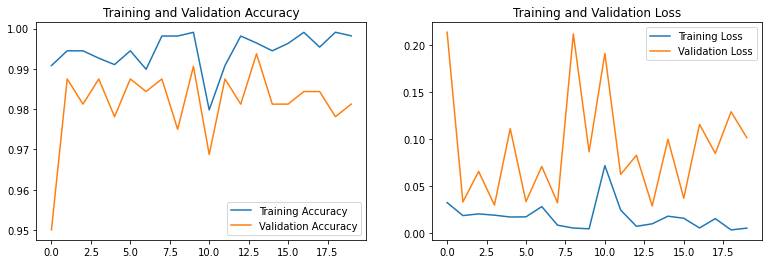

In [81]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(13, 4))
for i, metrics in enumerate(zip([acc, loss], [val_acc, val_loss], ['Accuracy', 'Loss'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(epochs, metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(epochs, metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
    plt.title('Training and Validation {}'.format(metrics[2]))
plt.show()

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
01dM3ewPIsnBICu1.png
Rock


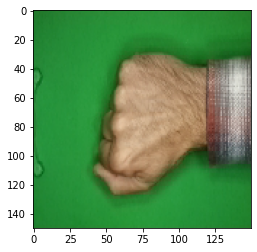

In [82]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size = (150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    
    print(fn)

    if classes[0][0] ==1:
        print('Paper')

    elif classes [0][1] ==1:
        print('Rock')

    else:
        print('Scissors')

Saving jl6AlteXSalbS3rG.png to jl6AlteXSalbS3rG.png
jl6AlteXSalbS3rG.png
Paper


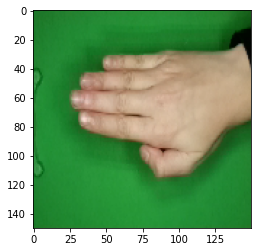

In [83]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size = (150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    
    print(fn)

    if classes[0][0] ==1:
        print('Paper')

    elif classes [0][1] ==1:
        print('Rock')

    else:
        print('Scissors')

Saving xXxXuQZdlW8ebxCN.png to xXxXuQZdlW8ebxCN.png
xXxXuQZdlW8ebxCN.png
Scissors


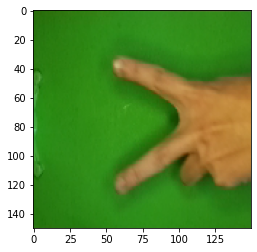

In [84]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size = (150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    
    print(fn)

    if classes[0][0] ==1:
        print('Paper')

    elif classes [0][1] ==1:
        print('Rock')

    else:
        print('Scissors')

In [92]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print("\nACCURACY IS GOOD BABY!!! 97% up")
      self.model.stop_training = True

callbacks = myCallback()

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [95]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [96]:
history = model.fit(
    data_train,
    steps_per_epoch = 35,
    epochs = 20,
    validation_data = data_valid,
    validation_steps = 10,
    verbose =2,
    callbacks = myCallback ()
)

Epoch 1/20
35/35 - 51s - loss: 1.0235 - accuracy: 0.4705 - val_loss: 0.7297 - val_accuracy: 0.6531
Epoch 2/20
35/35 - 50s - loss: 0.4926 - accuracy: 0.8083 - val_loss: 0.3929 - val_accuracy: 0.8062
Epoch 3/20
35/35 - 50s - loss: 0.2673 - accuracy: 0.9037 - val_loss: 0.2000 - val_accuracy: 0.9375
Epoch 4/20

ACCURACY IS GOOD BABY!!! 97% up
35/35 - 52s - loss: 0.1849 - accuracy: 0.9375 - val_loss: 0.1059 - val_accuracy: 0.9719


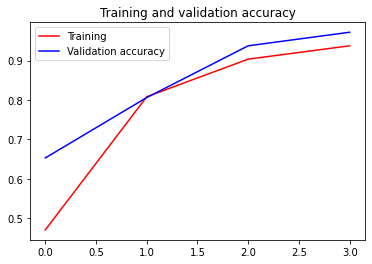

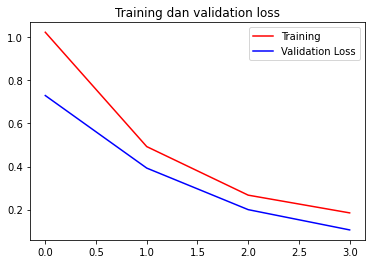

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training dan validation loss')
plt.legend()

plt.show()